# Loading cleaned datasets

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
path = "./data_clean/orderlines_qu.csv"
ordlns_df  = pd.read_csv(path)
path = "./data_clean/orders_qu.csv"
orders_df  = pd.read_csv(path)
path = "./data_clean/products_qu.csv"
products_df  = pd.read_csv(path)
path = "./data_clean/brands_qu.csv"
brands_df  = pd.read_csv(path)

In [4]:
ordlns_df["process_date"] = pd.to_datetime(ordlns_df["process_date"])
orders_df["created_date"] = pd.to_datetime(orders_df["created_date"])

# Sales and revenue by brand

In [33]:
brands_plot_df = (ordlns_df
                  .groupby(ordlns_df["brand_id"])
                  .agg(revenue = ("unit_price_total", "sum"),
                       sales = ("product_quantity", "sum"),
                       med_discount = ("discount_perc", "median"),
                       avg_discount = ("discount_perc", "mean")).reset_index()
                  ).nlargest(10, "sales").merge(brands_df, how = "left", on = "brand_id")

C:\Users\Johannes\anaconda3\envs\data_science\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


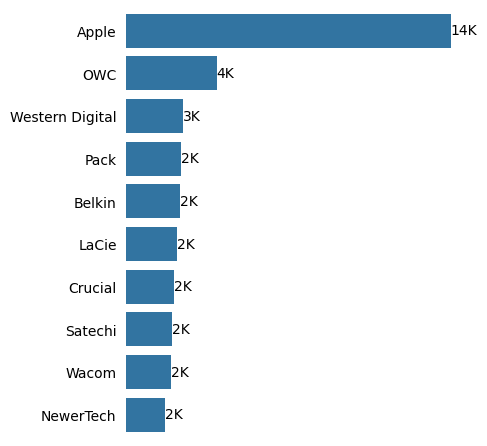

In [34]:
chart = sns.catplot(kind = "bar", data = brands_plot_df.sort_values("sales", ascending = False),
            y = "brand_name", x = "sales")
sns.despine(left=True, bottom=True)
chart.ax.grid(False)
chart.ax.set_facecolor("white")
chart.ax.set_xlabel(None)
chart.ax.set_ylabel(None)
chart.ax.tick_params(left=False)
chart.ax.get_xaxis().set_visible(False)
bar_labs =  ['{:,.0f}'.format(x) + 'K' for x in brands_plot_df.sort_values("sales", ascending = False)["sales"]/1000]
chart.ax.bar_label(chart.ax.containers[0], labels = bar_labs, fontsize = 10);

C:\Users\Johannes\anaconda3\envs\data_science\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


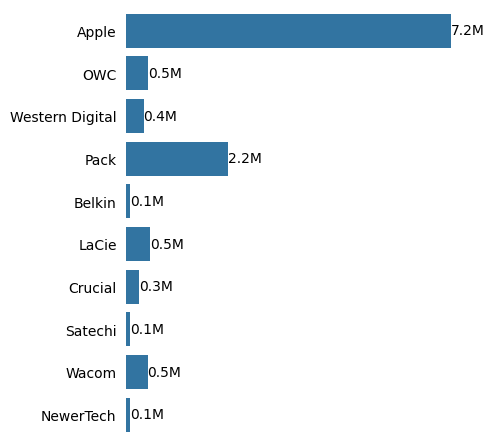

In [35]:
chart = sns.catplot(kind = "bar", data = brands_plot_df.sort_values("sales", ascending = False),
            y = "brand_name", x = "revenue")
sns.despine(left=True, bottom=True)
chart.ax.grid(False)
chart.ax.set_facecolor("white")
chart.ax.set_xlabel(None)
chart.ax.set_ylabel(None)
chart.ax.tick_params(left=False)
chart.ax.get_xaxis().set_visible(False)
bar_labs =  ['{:,.1f}'.format(x) + 'M' for x in brands_plot_df.sort_values("sales", ascending = False)["revenue"]/1000000]
chart.ax.bar_label(chart.ax.containers[0], labels = bar_labs, fontsize = 10);

# Sales and revenue by category

In [38]:
color_dict = dict(zip(list(ordlns_df["broad_categories"].unique()),sns.color_palette(n_colors=10, as_cmap=True)))
color_dict

{'parts': '#1f77b4',
 'other': '#ff7f0e',
 'desktop': '#2ca02c',
 'devices_and_gadgets': '#d62728',
 'accessories': '#9467bd',
 'NAS': '#8c564b',
 'adapters_and_cables': '#e377c2',
 'warranty_plans': '#7f7f7f',
 'iphones': '#bcbd22',
 'ipads': '#17becf'}

In [42]:
category_plot_df = (ordlns_df
                  .groupby(ordlns_df["broad_categories"])
                  .agg(revenue = ("unit_price_total", "sum"),
                       sales = ("product_quantity", "sum"),
                       med_discount = ("discount_perc", "median"),
                       avg_discount = ("discount_perc", "mean")).reset_index()
                  )
category_plot_df = category_plot_df.sort_values("sales", ascending = True)

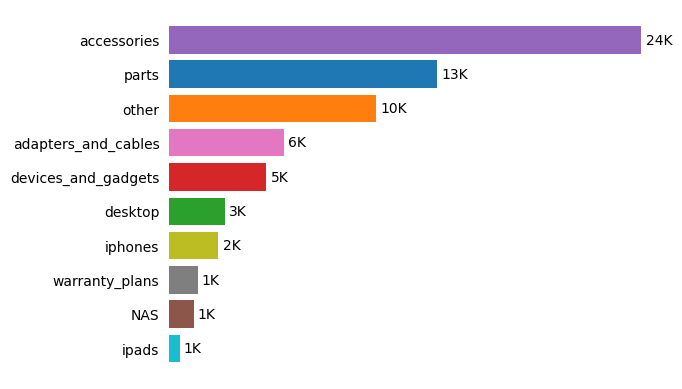

In [54]:
fig, ax = plt.subplots()

bars = ax.barh(category_plot_df['broad_categories'], category_plot_df['sales'], color=[color_dict[c] for c in category_plot_df['broad_categories']])
for bar in bars:
    width = bar.get_width()
    ax.annotate('{:,.0f}K'.format(width/1000),
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(3, 0),
                textcoords="offset points",
                ha='left', va='center')
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='x', bottom=False, left=False, labelbottom=False)
ax.tick_params(axis='y', left=False)

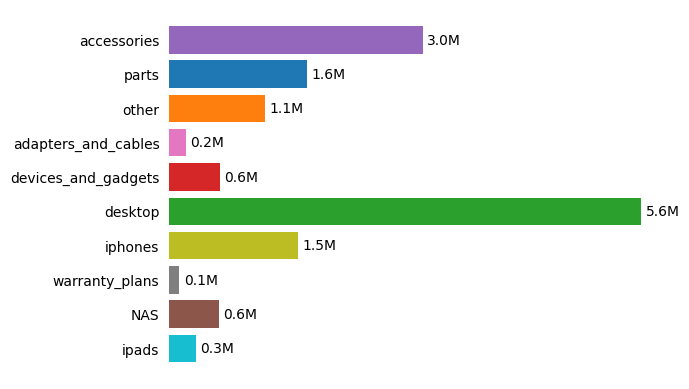

In [53]:
fig, ax = plt.subplots()

bars = ax.barh(category_plot_df['broad_categories'], category_plot_df['revenue'], color=[color_dict[c] for c in category_plot_df['broad_categories']])
for bar in bars:
    width = bar.get_width()
    ax.annotate('{:,.1f}M'.format(width/1000000),
                xy=(width, bar.get_y() + bar.get_height() / 2),
                xytext=(3, 0),
                textcoords="offset points",
                ha='left', va='center')
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.tick_params(axis='x', bottom=False, left=False, labelbottom=False)
ax.tick_params(axis='y', left=False)

# Trends in Sales, Discounts and Revenue

In [45]:
sales_plot_df = (ordlns_df
                  .groupby([ordlns_df["process_date"].dt.strftime("%Y-%m")])
                  .agg(revenue = ("unit_price_total", "sum"),
                       sales = ("product_quantity", "sum"),
                       med_discount = ("discount_perc", "median"),
                       avg_discount = ("discount_perc", "mean")).reset_index()
                  )

C:\Users\Johannes\AppData\Local\Temp\ipykernel_27628\1986372857.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation = 45);


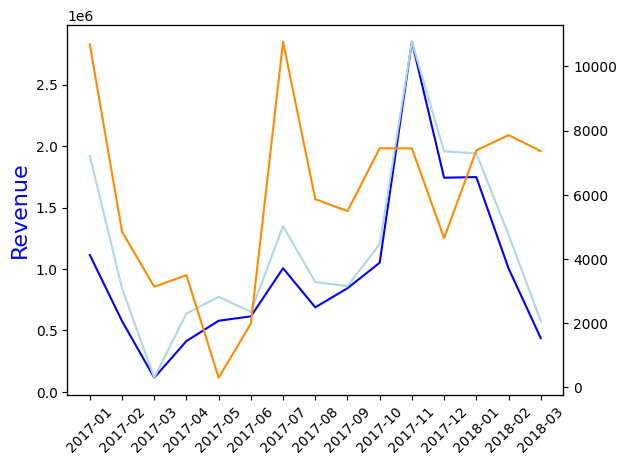

In [55]:
fig,ax = plt.subplots()
ax.plot(sales_plot_df["process_date"], sales_plot_df["revenue"], color="blue")
ax.set_ylabel('Revenue', color="blue", fontsize=16)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45);

ax2 = ax.twinx()
ax2.plot(sales_plot_df["process_date"], sales_plot_df["sales"], color="lightblue")

ax3 = ax.twinx()
ax3.plot(sales_plot_df["process_date"], sales_plot_df["avg_discount"], color="darkorange")
ax3.tick_params(axis='y', bottom=False, right=False, labelbottom=False)
ax3.tick_params(axis='y', right=False, left=False, labelright=False, labelleft=False)

single plot layers for presentation

In [96]:
def draw_plot(ax1_show = False, ax2_show = False, ax3_show = False, linewd = 2, w = 10, h = 6):
    chart,ax1 = plt.subplots()
    ax2 = ax1.twinx()
    ax3 = ax1.twinx()

    ax1.plot(sales_plot_df["process_date"], sales_plot_df["revenue"], color="blue")
    ax2.plot(sales_plot_df["process_date"], sales_plot_df["sales"], color="lightblue")
    ax3.plot(sales_plot_df["process_date"], sales_plot_df["avg_discount"], color="darkorange")
    
    if ax1_show: 
        ax = ax1
    elif ax2_show: 
        ax = ax2
    else: 
        ax = ax3
    
    ax1.set_visible(ax1_show)
    ax2.set_visible(ax2_show)
    ax3.set_visible(ax3_show)
    ax1.get_xaxis().set_visible(False)
    ax1.get_yaxis().set_visible(False)
    ax2.get_yaxis().set_visible(False)
    ax3.get_yaxis().set_visible(False)
    
    
    ax.axvline(x = 0, ymin = 0, ymax = 1000000, color = "darkgrey", linestyle = "dashed", linewidth = 2)
    ax.axvline(x = 12, ymin = 0, ymax = 1000000, color = "darkgrey", linestyle = "dashed", linewidth = 2)
    
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    chart.set_size_inches(w, h)

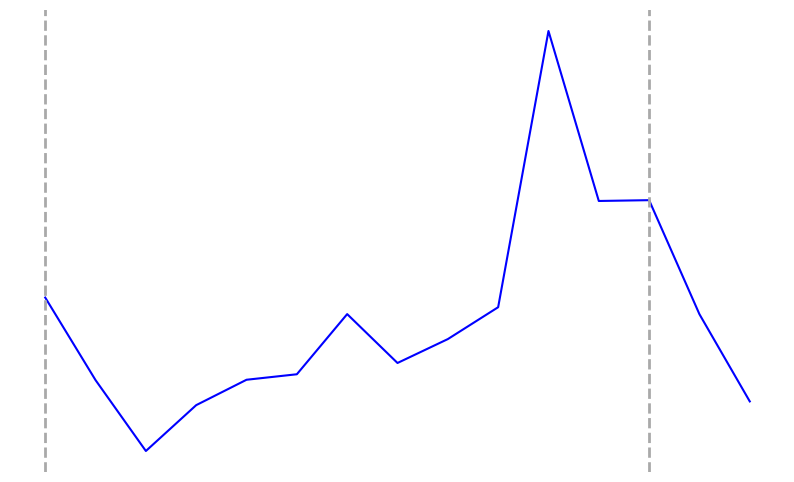

In [97]:
draw_plot(ax1_show = True)

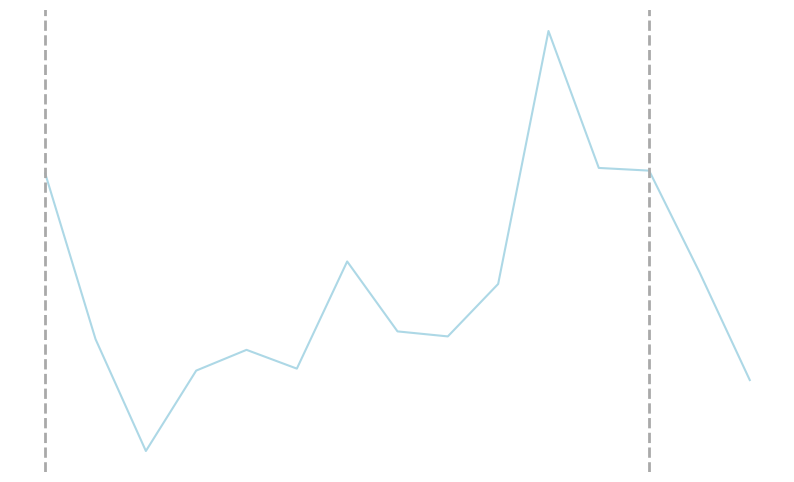

In [100]:
draw_plot(ax2_show = True)

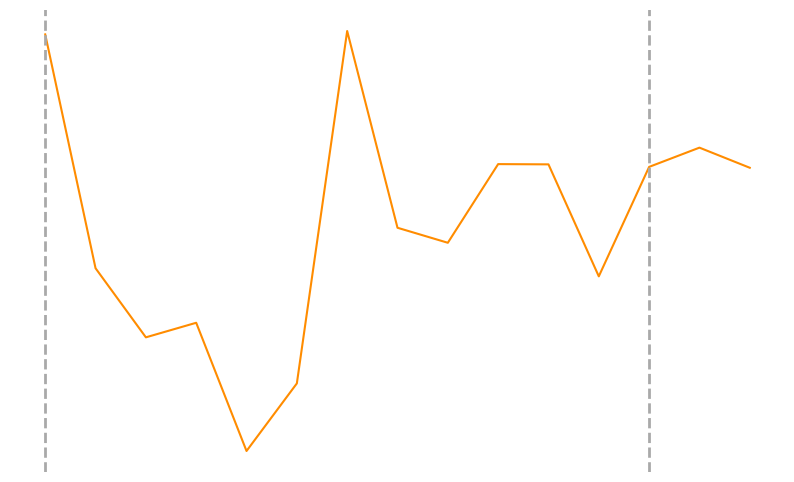

In [99]:
draw_plot(ax3_show = True)

# Relationship between Discounts vs. Sales and Revenue

creating bins for discounts

In [101]:
bin_range = range(-50,100,5)
discount_bins = pd.cut(ordlns_df['discount_perc'], bins=bin_range, include_lowest=False)

In [103]:
disc_sales_plot_df = ordlns_df.groupby(discount_bins).agg(revenue = ("unit_price_total", "sum"),sales = ("product_quantity", "sum"))
disc_sales_plot_df["discount"] = bin_range[:len(bin_range)-1]

In [105]:
disc_sales_plot_df.loc[disc_sales_plot_df["revenue"]==disc_sales_plot_df["revenue"].max(),"discount"].values[0] # max revenue

5

C:\Users\Johannes\AppData\Local\Temp\ipykernel_27628\3030004165.py:20: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(tick_labels_disc, fontsize = 15, color = "darkorange")
C:\Users\Johannes\AppData\Local\Temp\ipykernel_27628\3030004165.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(tick_labels_rev, fontsize = 15, color = "darkblue")
C:\Users\Johannes\AppData\Local\Temp\ipykernel_27628\3030004165.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(tick_labels_sal, fontsize = 15, color = "lightblue")


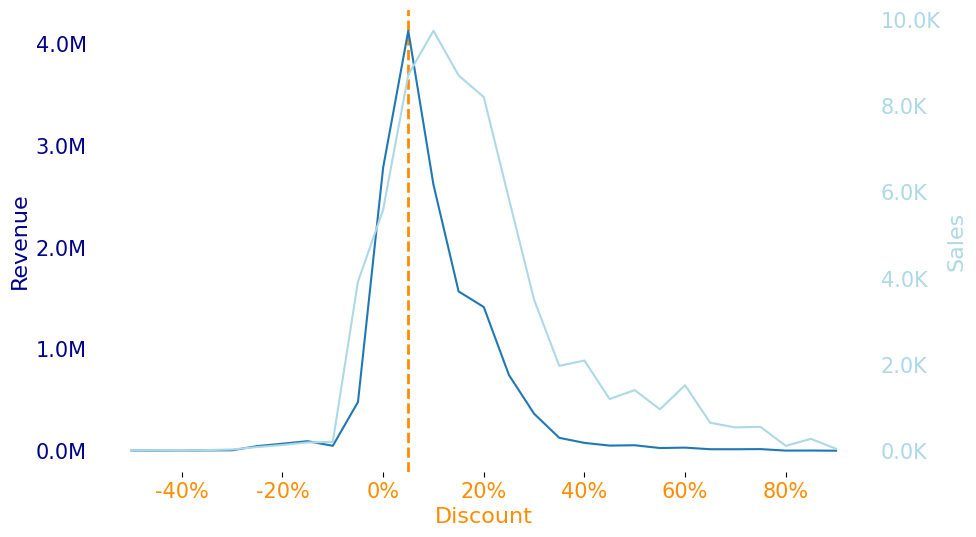

In [109]:
chart,ax = plt.subplots()
chart.set_size_inches(6, h)
ax2 = ax.twinx()
ax.grid(False)
ax2.grid(False)
ax.axvline(x = disc_sales_plot_df.loc[disc_sales_plot_df["revenue"]==disc_sales_plot_df["revenue"].max(),"discount"].values[0],
           ymin = 0, ymax = 10000000, color = "darkorange", linestyle = "dashed", linewidth = 2)
ax.set_facecolor("white")

ax.plot(disc_sales_plot_df["discount"], disc_sales_plot_df["revenue"])
ax2.plot(disc_sales_plot_df["discount"], disc_sales_plot_df["sales"], color="lightblue")
ax.set_xlabel('Discount', color="darkorange", fontsize=16)
ax.set_ylabel('Revenue', color="darkblue", fontsize=16)
ax2.set_ylabel('Sales', color="lightblue", fontsize=16)
tick_labels_disc = ['{:,.0f}'.format(x) + '%' for x in ax.get_xticks()]
tick_labels_rev = ['{:,.1f}'.format(x) + 'M' for x in ax.get_yticks()/1000000]
tick_labels_sal = ['{:,.1f}'.format(x) + 'K' for x in ax2.get_yticks()/1000]
ax.tick_params(left = False)
ax2.tick_params(right = False)
ax.set_xticklabels(tick_labels_disc, fontsize = 15, color = "darkorange")
ax.set_yticklabels(tick_labels_rev, fontsize = 15, color = "darkblue")
ax2.set_yticklabels(tick_labels_sal, fontsize = 15, color = "lightblue")
sns.despine(left=True, bottom=True)
chart.set_size_inches(10, 6)